   age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unknown  no  
1       151         1     -1         0  unknown  no  
2        76         1     -1         0  unknown  no  
3        92         1     -1         0  unknown  no  
4       198         1     -1         0  unknown  no  

Самое частое значение в столбце education: secondary


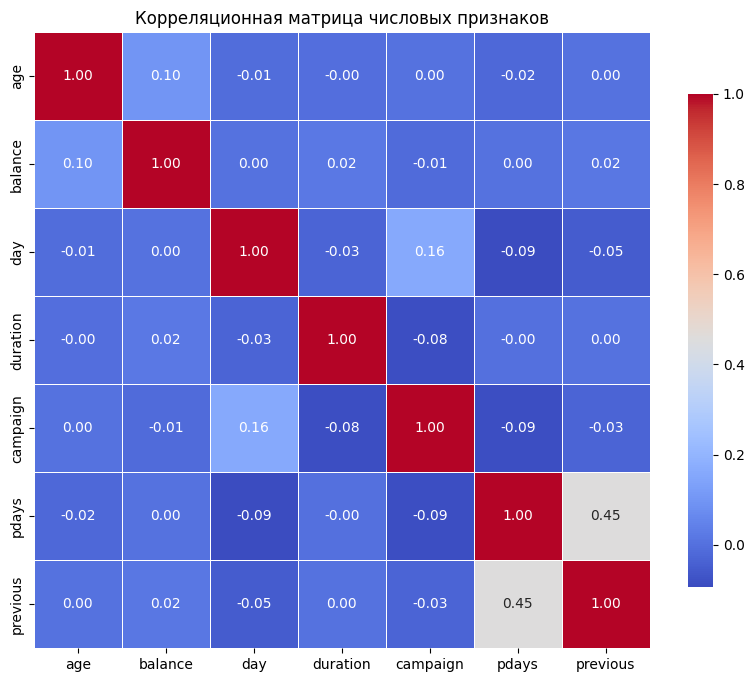


Два признака с наибольшей корреляцией: ('pdays', 'previous') с коэффициентом: 0.45

Размеры наборов:
Тренировочный набор: 27126 записей
Валидационный набор: 9042 записей
Тестовый набор: 9043 записей

Взаимная информация между y и категориальными переменными:
contact: 0.01
education: 0.0
housing: 0.01
poutcome: 0.03

Переменная с наибольшей взаимной информацией: poutcome (MI: 0.03)



C:\Users\Наталья\AppData\Local\Temp\ipykernel_7584\337810086.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['y'] = df_selected['y'].map({'yes': 1, 'no': 0})


Точность на валидационном наборе: 0.9


Точности без каждого признака:
           Feature  Accuracy Difference
0              age            -0.000686
1          balance            -0.000796
2  marital_married            -0.000464
3   marital_single            -0.000354
4         previous            -0.000907

Признак с наименьшей разницей в точности: previous с разницей: -0.0009

Обучаем модель с C = 0.01
Обучаем модель с C = 0.1
Обучаем модель с C = 1
Обучаем модель с C = 10

Точности при различных уровнях регуляризации:
       C  Accuracy
0   0.01     0.898
1   0.10     0.900
2   1.00     0.901
3  10.00     0.900

Лучшее значение C: 1.0 с точностью: 0.901


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


# Загружаем данные
df = pd.read_csv('bank-full.csv', sep=';')  # Убедитесь, что разделитель соответствует вашему файлу

# Указываем нужные признаки
features = ['age', 'job', 'marital', 'education', 'balance', 
            'housing', 'contact', 'day', 'month', 'duration', 
            'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Выбираем указанные признаки
df_selected = df[features]

# Выводим первые 5 строк выбранных признаков
print(df_selected.head())

# Проверяем наличие пропущенных значений
missing_values = df_selected.isnull().sum()

most_frequent_education = df_selected['education'].mode()[0]

# Выводим результат
print()
print(f"Самое частое значение в столбце education: {most_frequent_education}")

# Оставляем только числовые столбцы для корреляционной матрицы
numerical_features = df_selected.select_dtypes(include=[np.number])

# Создаём корреляционную матрицу
correlation_matrix = numerical_features.corr()

# Настраиваем размер графика
plt.figure(figsize=(10, 8))

# Создаём тепловую карту (heatmap)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Добавляем заголовок
plt.title('Корреляционная матрица числовых признаков')

# Показываем график
plt.show()

# Находим пару признаков с наибольшей корреляцией
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Исключаем самосопоставления (например, ('age', 'age'))
max_corr = max_corr[max_corr < 1]

# Находим два признака с наибольшей корреляцией
most_correlated = max_corr.idxmax()
highest_correlation_value = max_corr.max()

# Выводим результат
print(f"\nДва признака с наибольшей корреляцией: {most_correlated} с коэффициентом: {highest_correlation_value:.2f}")

print()
# Кодируем переменную y, используя .loc
df_selected['y'] = df_selected['y'].map({'yes': 1, 'no': 0})

# Отделяем признаки от целевой переменной
X = df_selected.drop('y', axis=1)  # Все признаки
y = df_selected['y']                 # Целевая переменная

# Разделяем данные на тренировочный, валидационный и тестовый наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% на тренировочный
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% на валидационный и тестовый

# Проверяем размеры наборов
print(f"Размеры наборов:")
print(f"Тренировочный набор: {X_train.shape[0]} записей")
print(f"Валидационный набор: {X_val.shape[0]} записей")
print(f"Тестовый набор: {X_test.shape[0]} записей")

print()
# Переменные для расчета взаимной информации
categorical_vars = ['contact', 'education', 'housing', 'poutcome']

# Рассчитываем взаимную информацию и округляем результаты
mi_scores = {}
for var in categorical_vars:
    score = mutual_info_score(X_train[var], y_train)
    mi_scores[var] = round(score, 2)

# Выводим результаты
print("Взаимная информация между y и категориальными переменными:")
for var, score in mi_scores.items():
    print(f"{var}: {score}")

# Найдем переменную с наибольшей взаимной информацией
max_var = max(mi_scores, key=mi_scores.get)
print(f"\nПеременная с наибольшей взаимной информацией: {max_var} (MI: {mi_scores[max_var]})")

print()
# Применяем one-hot кодирование к категориальным переменным
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, drop_first=True)

# Уравниваем размеры тренировочного и валидационного наборов
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Обучаем модель логистической регрессии
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Предсказываем на валидационном наборе
y_val_pred = model.predict(X_val_encoded)

# Рассчитываем точность
accuracy = accuracy_score(y_val, y_val_pred)

# Округляем до двух знаков после запятой и выводим результат
accuracy = round(accuracy, 2)
print(f"Точность на валидационном наборе: {accuracy}")

print()
features_to_exclude = ['age', 'balance', 'marital_married', 'marital_single', 'previous'] 
# Словарь для хранения результатов точности
accuracy_diff = {}

# Исходная точность модели
initial_accuracy = accuracy

# Исключаем каждый признак по очереди
for feature in features_to_exclude:
    # Исключаем текущий признак из графиков
    X_train_without_feature = X_train_encoded.drop(feature, axis=1)
    X_val_without_feature = X_val_encoded.drop(feature, axis=1)
    
    # Обучаем модель без данного признака
    model.fit(X_train_without_feature, y_train)
    
    # Предсказываем на валидационном наборе
    y_val_pred_without_feature = model.predict(X_val_without_feature)
    
    # Рассчитываем точность без этого признака
    accuracy_without_feature = accuracy_score(y_val, y_val_pred_without_feature)
    
    # Вычисляем разницу в точности
    accuracy_diff[feature] = initial_accuracy - accuracy_without_feature

# Превращаем словарь в DataFrame для упрощенного анализа
accuracy_diff_df = pd.DataFrame(list(accuracy_diff.items()), columns=['Feature', 'Accuracy Difference'])

# Находим признак с наименьшей разницей
min_diff_feature = accuracy_diff_df.loc[accuracy_diff_df['Accuracy Difference'].idxmin()]

# Выводим результаты
print("\nТочности без каждого признака:")
print(accuracy_diff_df)

print(f"\nПризнак с наименьшей разницей в точности: {min_diff_feature['Feature']} с разницей: {min_diff_feature['Accuracy Difference']:.4f}")

print()
# Задаем значения C для регуляризации
C_values = [0.01, 0.1, 1, 10]

# Словарь для хранения результатов точности
accuracy_results = {}

# Обучаем логистическую регрессию с различными значениями C
for C in C_values:
    print(f"Обучаем модель с C = {C}")
    
    # Создаем модель с текущим значением C
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    
    # Обучаем модель на тренировочном наборе
    model.fit(X_train_encoded, y_train)
    
    # Предсказываем на валидационном наборе
    y_val_pred = model.predict(X_val_encoded)
    
    # Рассчитываем точность
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Округляем точность до трех знаков после запятой и сохраняем результат
    accuracy_results[C] = round(accuracy, 3)

# Превращаем результаты в DataFrame для удобного отображения
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()), columns=['C', 'Accuracy'])

# Находим значение C с наилучшей точностью
best_C_value = accuracy_results_df.loc[accuracy_results_df['Accuracy'].idxmax()]

# Выводим результаты
print("\nТочности при различных уровнях регуляризации:")
print(accuracy_results_df)

print(f"\nЛучшее значение C: {best_C_value['C']} с точностью: {best_C_value['Accuracy']}")